In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [4]:

from google.colab import files
uploaded = files.upload()


Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv


In [6]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [7]:
print(df.isnull().sum())  # Check for missing values
df.dropna(inplace=True)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

<Axes: xlabel='condition', ylabel='count'>

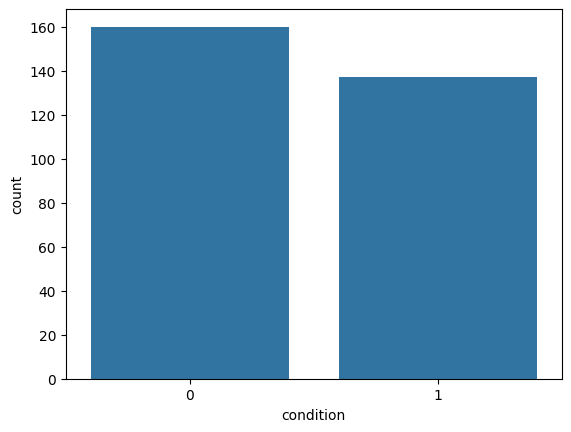

In [12]:
print(df.describe())
sns.countplot(data=df, x='condition')

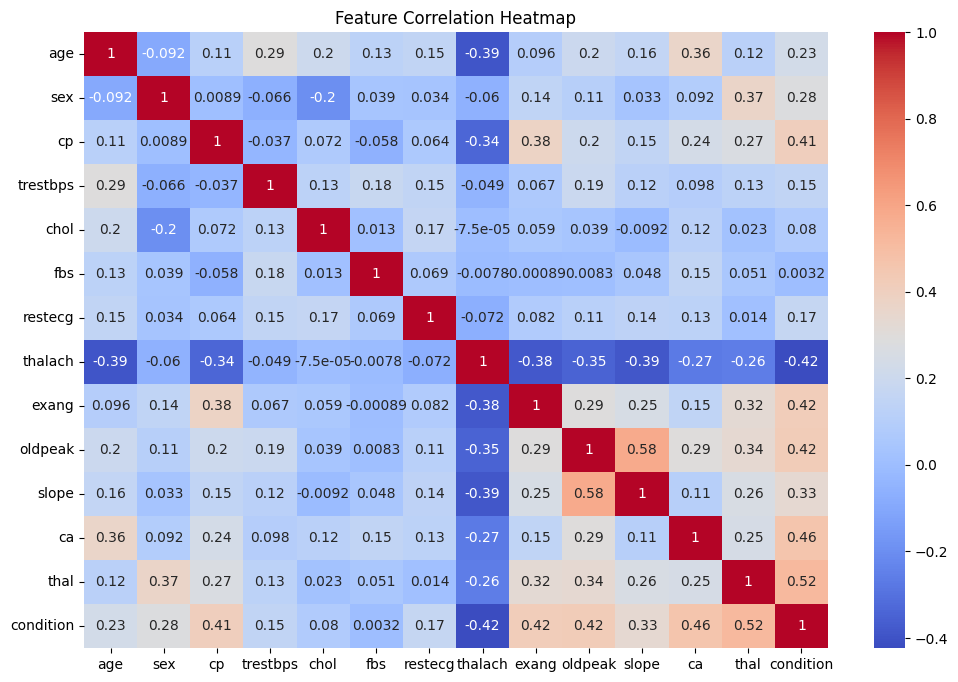

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
X = df.drop('condition', axis=1)
y = df['condition']

In [18]:
X = df.drop('condition', axis=1)
y = df['condition']

In [22]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

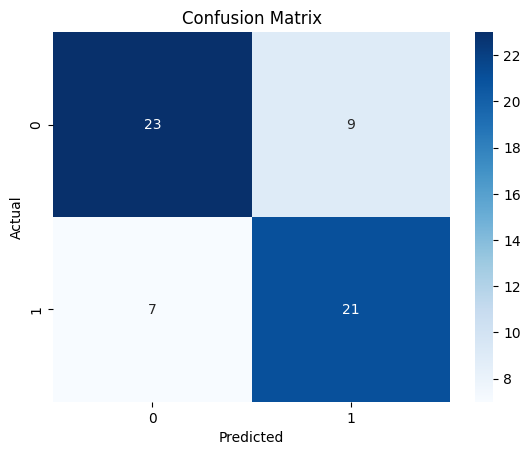

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


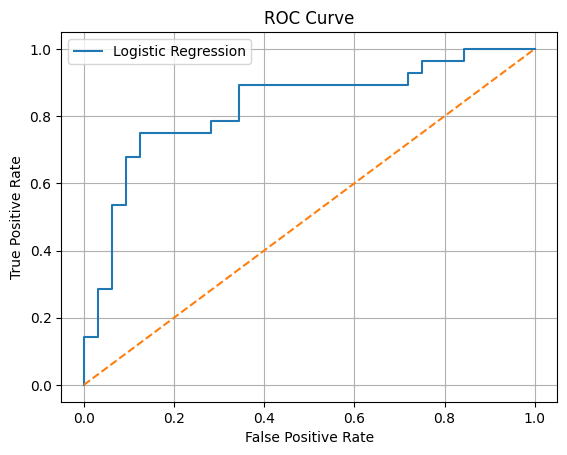

In [24]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [25]:
auc = roc_auc_score(y_test, y_probs)
print(f'ROC AUC Score: {auc:.2f}')

ROC AUC Score: 0.83


In [26]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance = importance.sort_values(key=abs, ascending=False)

print("\nTop important features:")
print(importance.head(10))



Top important features:
ca         1.268018
sex        1.194524
thal       0.904722
exang      0.519535
oldpeak    0.508502
fbs       -0.421283
cp         0.254363
restecg    0.206276
slope      0.174528
thalach   -0.043295
dtype: float64


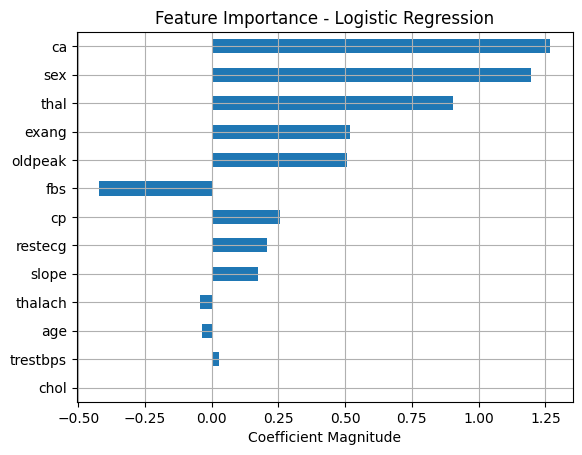

In [27]:
importance.plot(kind='barh')
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Coefficient Magnitude")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()